# Updating Kontext with mask images

In [1]:
import torch
from diffusers import FluxKontextInpaintPipeline
from diffusers.utils import load_image

pipe = FluxKontextInpaintPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-Kontext-dev",
    torch_dtype=torch.bfloat16
)
pipe.to("cuda")

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 102.81it/s]

Loading pipeline components...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 12.87it/s]


FluxKontextInpaintPipeline {
  "_class_name": "FluxKontextInpaintPipeline",
  "_diffusers_version": "0.35.0.dev0",
  "_name_or_path": "black-forest-labs/FLUX.1-Kontext-dev",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "FluxTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [3]:


# Load your images
image = load_image("input_data/4.png")         # RGB image
mask  = load_image("input_data/4_mask_text.png").convert("L")  # Grayscale mask

# Run inpainting
prompt = "Replace only the text 'CALZADO' for 'ROPA' "
result = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask,
    guidance_scale=5,
    width=1920,   
    height=500,  
    num_inference_steps=40
).images[0]

#print(result.size)
#result#.save("output.png")


Generation `height` and `width` have been adjusted to 512 and 2000 to fit the model requirements.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:19<00:00,  2.03it/s]


Final result size: (1920, 528)


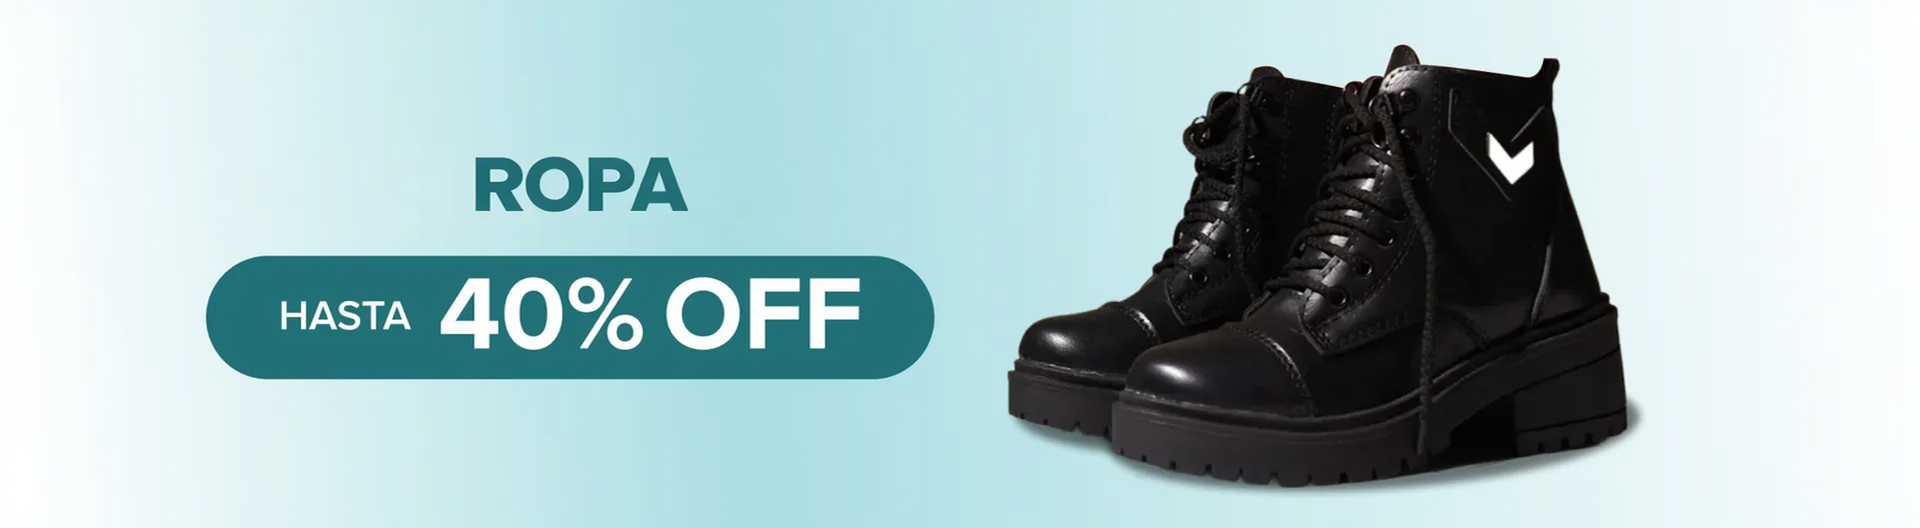

In [4]:
from PIL import Image  

# Resize the result back to the original input image size
result_resized = result.resize(image.size, Image.LANCZOS)

# Optional: Show or save
print(f"Final result size: {result_resized.size}")
result_resized.save("input_data/4_output_1.png")
result_resized


(1920, 528)


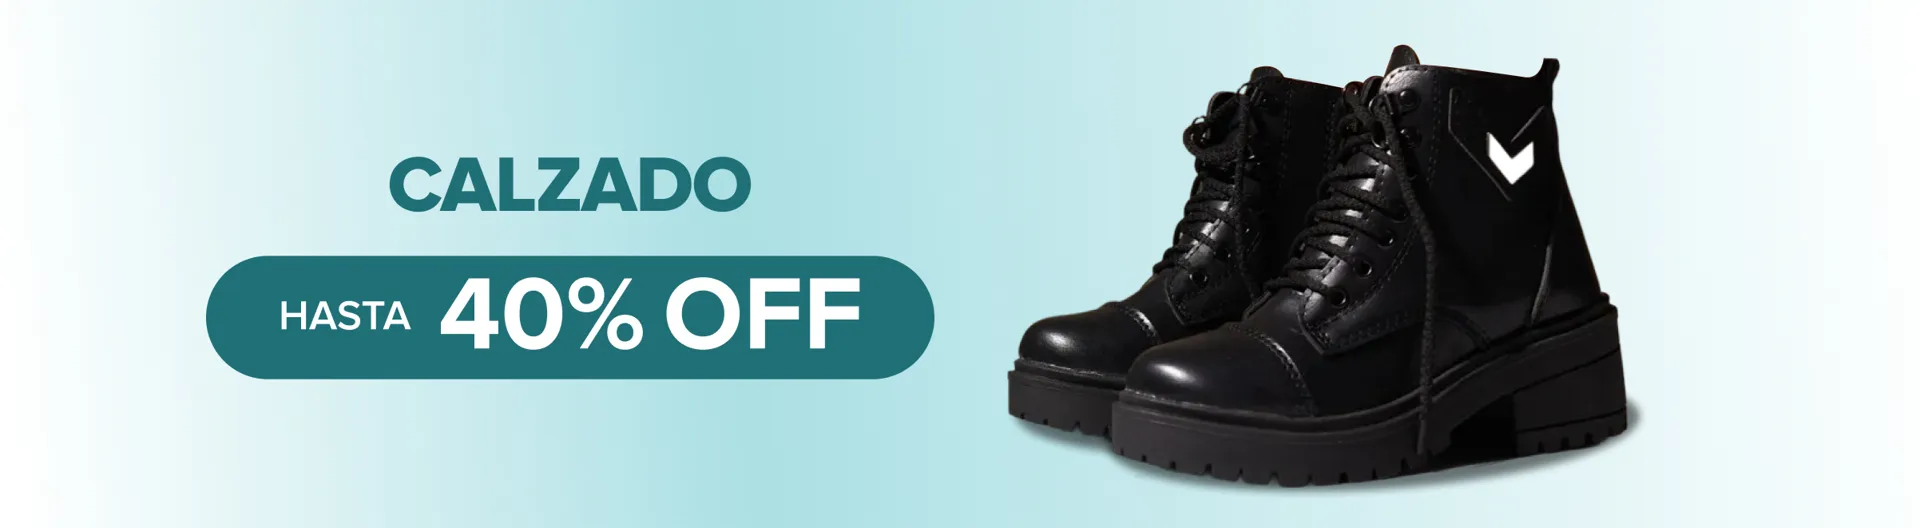

In [3]:
print(image.size)
image

(1920, 528)


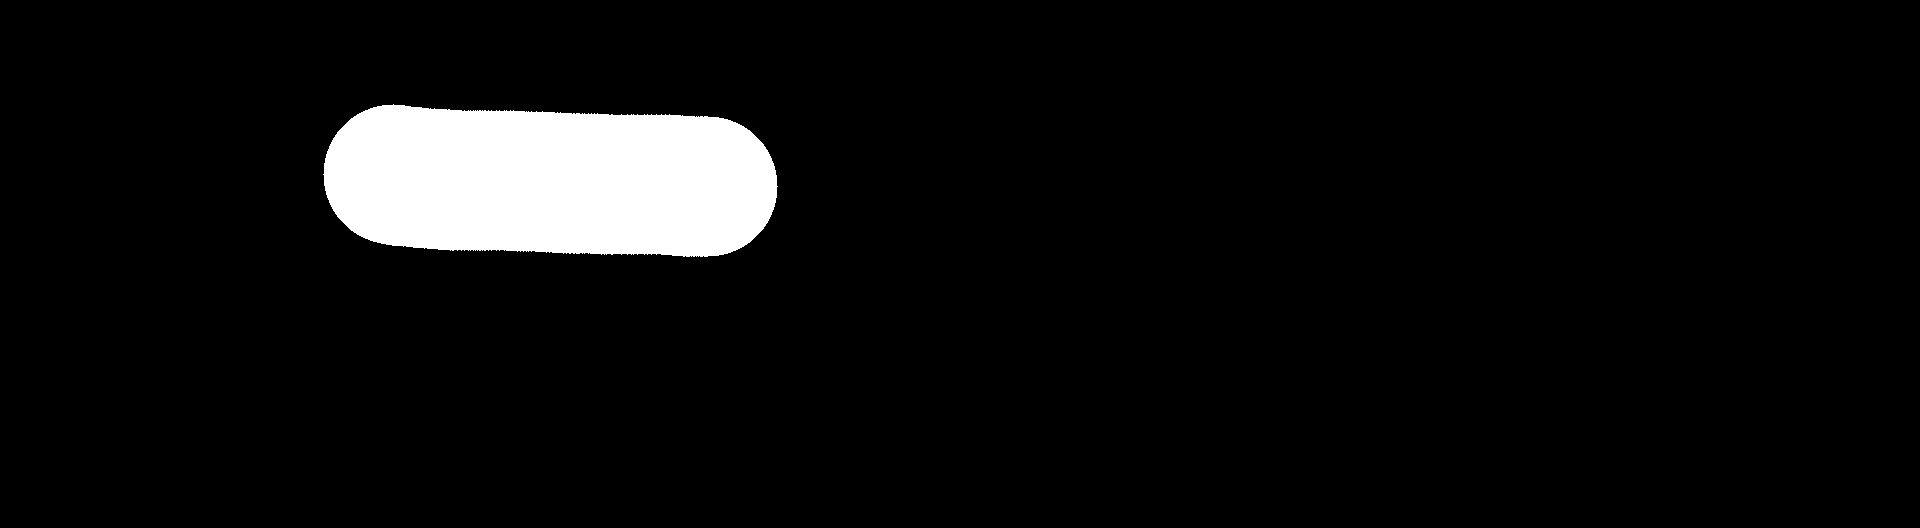

In [4]:
print(mask.size)
mask

## Let the pipeline infer the correct size from the input image 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:19<00:00,  2.03it/s]


(1568, 672)


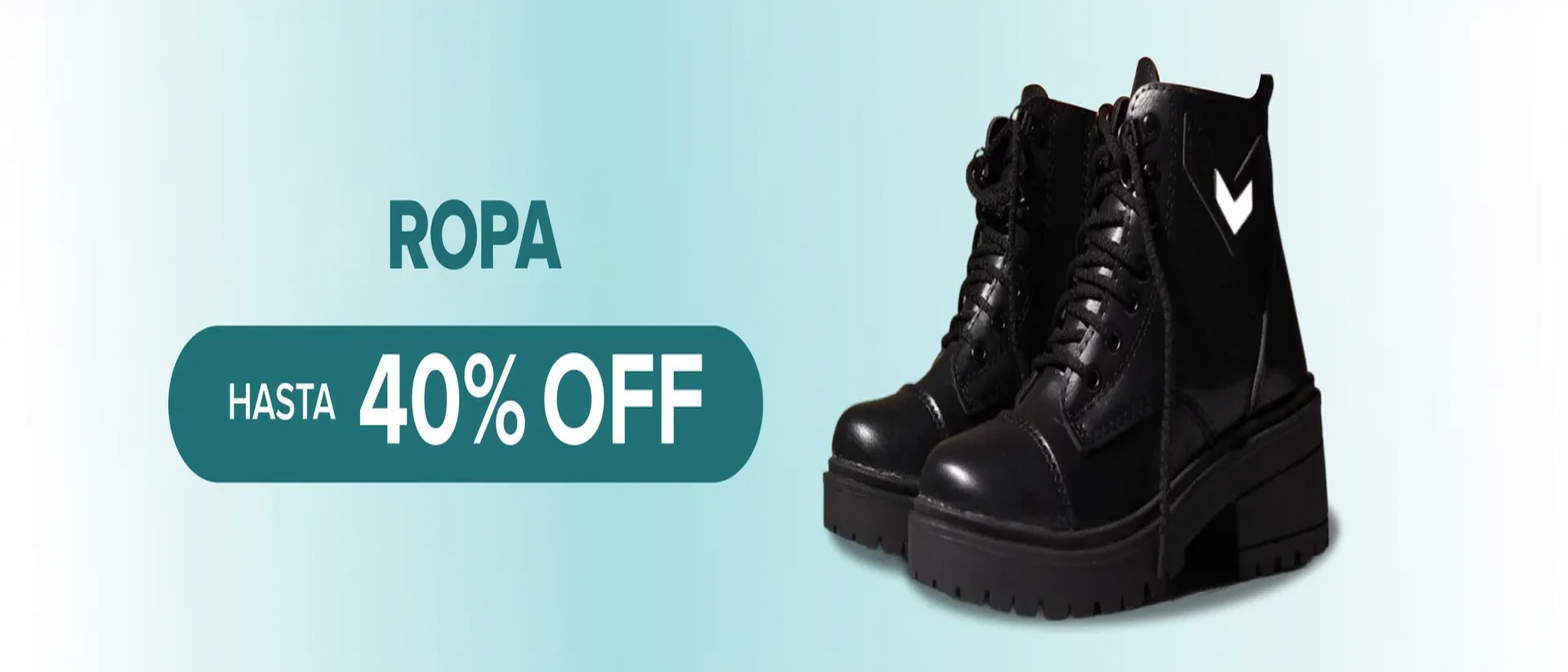

In [5]:
#import torch
#from diffusers import FluxKontextInpaintPipeline
#from diffusers.utils import load_image#

#pipe = FluxKontextInpaintPipeline.from_pretrained(
#    "black-forest-labs/FLUX.1-Kontext-dev",
#    torch_dtype=torch.bfloat16
#)
#pipe.to("cuda")

# Load your images
image = load_image("input_data/4.png")         # RGB image
mask  = load_image("input_data/4_mask_text.png").convert("L")  # Grayscale mask

# Run inpainting
prompt = "Replace only the text 'CALZADO' for 'ROPA' "
result = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask,
    guidance_scale=5,
    #width=1920,   
    #height=500,  
    num_inference_steps=40
).images[0]

print(result.size)
result#.save("output.png")


Final result size: (1920, 528)


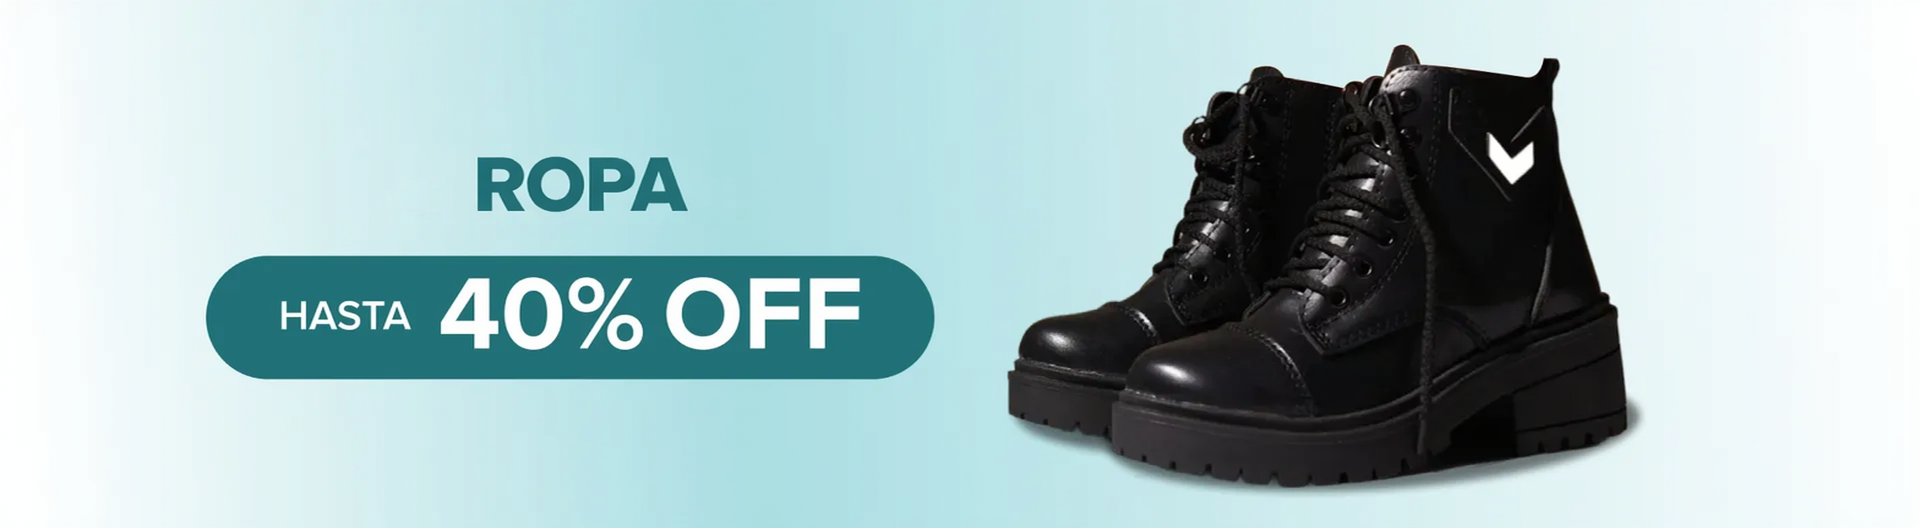

In [6]:
from PIL import Image  

# Resize the result back to the original input image size
result_resized = result.resize(image.size, Image.LANCZOS)

# Optional: Show or save
print(f"Final result size: {result_resized.size}")
result_resized.save("input_data/4_output_resized.png")
result_resized


(1920, 528)


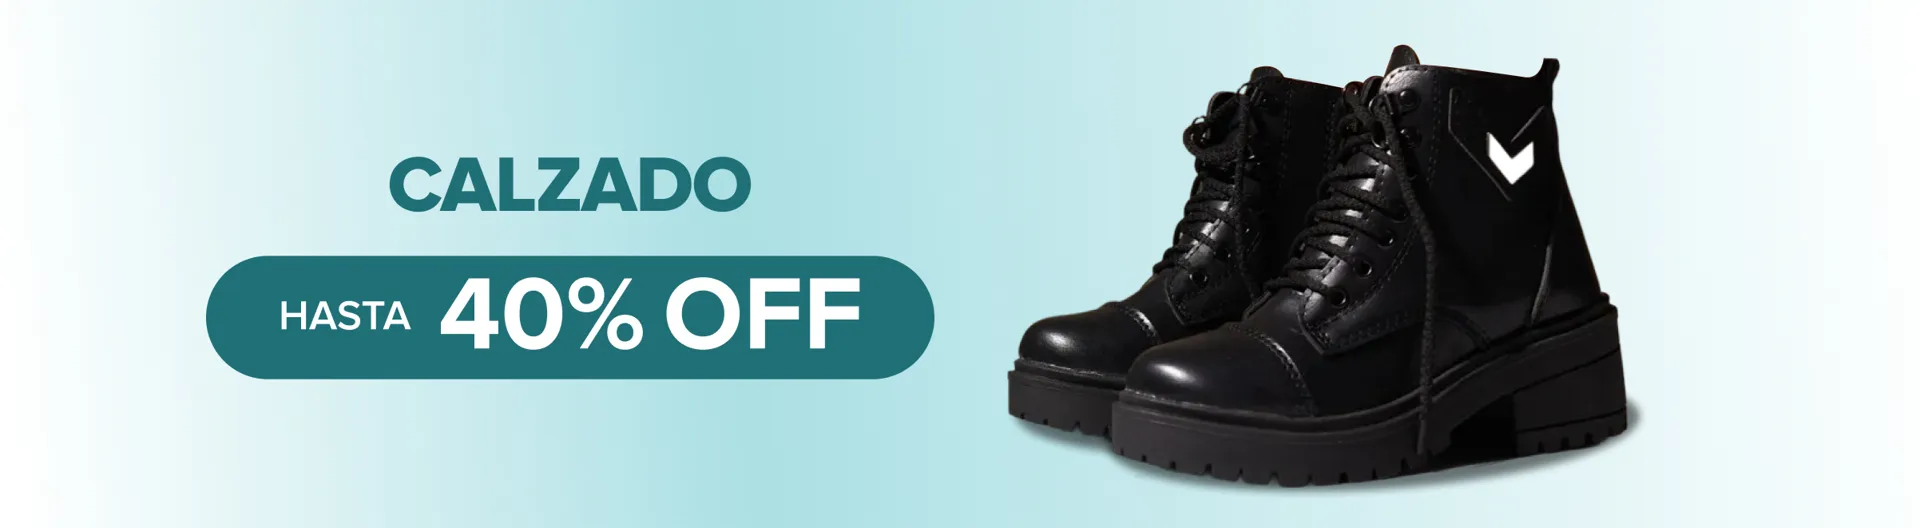

In [7]:
print(image.size)
image

(1920, 528)


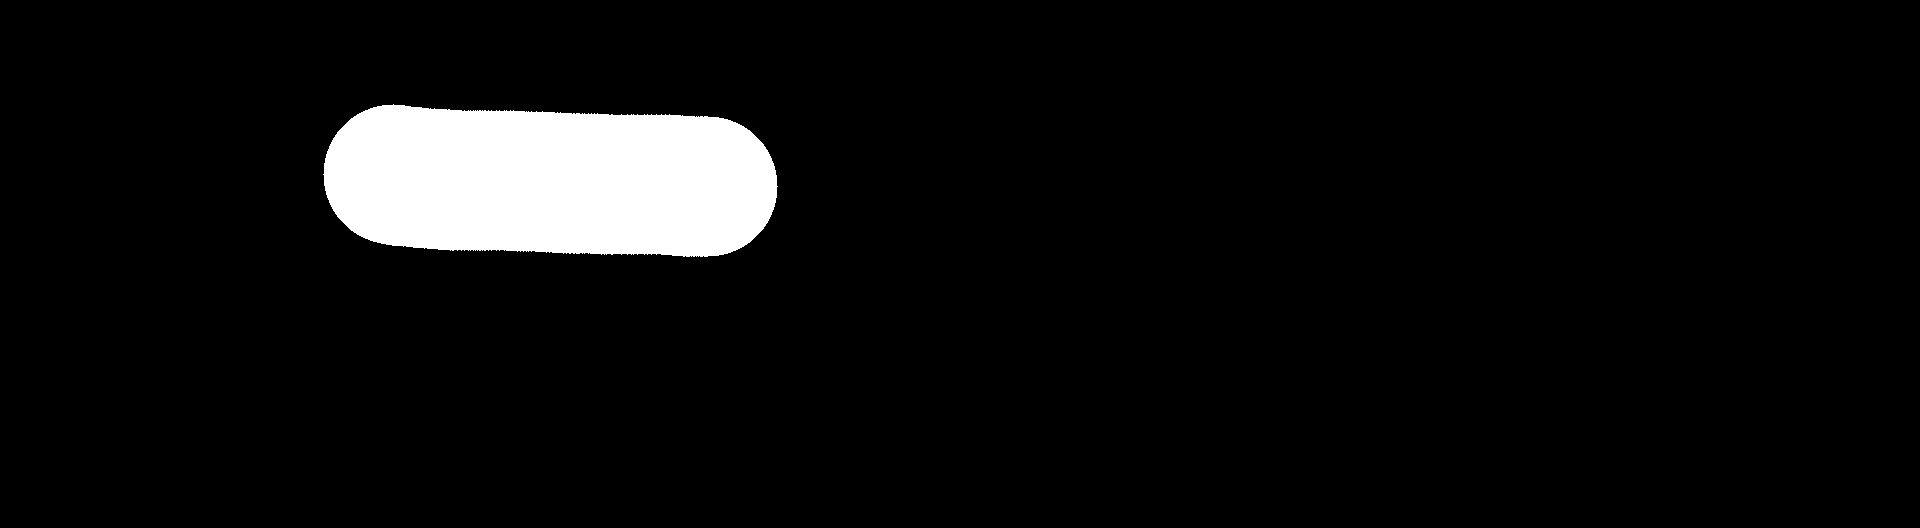

In [8]:
print(mask.size)
mask

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:49<00:00,  2.02it/s]


(1568, 672)


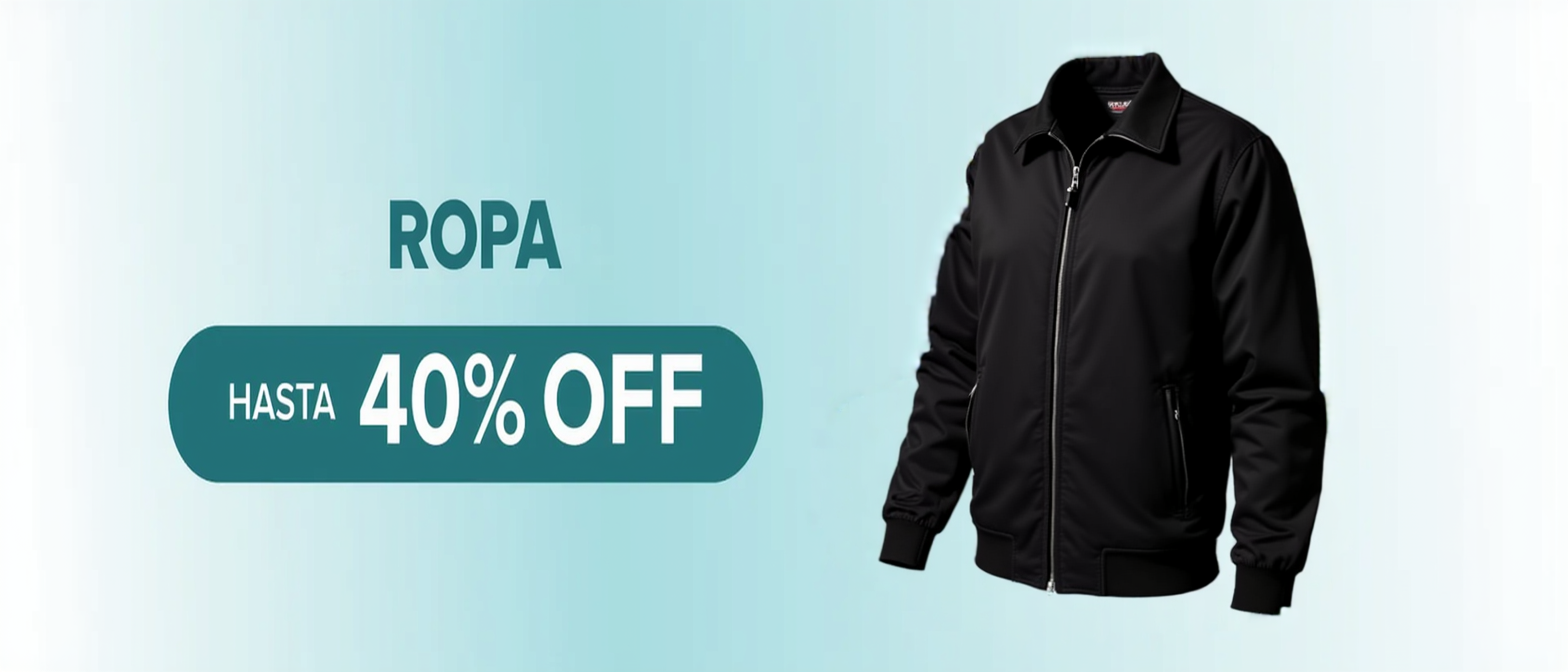

In [9]:
#import torch
#from diffusers import FluxKontextInpaintPipeline
#from diffusers.utils import load_image

#pipe = FluxKontextInpaintPipeline.from_pretrained(
#    "black-forest-labs/FLUX.1-Kontext-dev",
#    torch_dtype=torch.bfloat16
#)
#pipe.to("cuda")

# Load your images
image = load_image("input_data/4_output_resized.png")         # RGB image
mask  = load_image("input_data/4_mask.png").convert("L")  # Grayscale mask

# Run inpainting
prompt = "Replace only the black shoes with a black jacket. Keep the rest of the image exactly the same."


prompt = (
    "Replace only the black shoes with a realistic black jacket in the same location. "
    "Ensure the jacket is well-integrated into the scene with accurate shadows, lighting, and perspective. "
    "Do not modify the rest of the image; preserve the background, composition, and style and other objects."
)

result = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask,
    guidance_scale=3,
    #width=1920,   
    #height=500,  
    num_inference_steps=100
).images[0]

print(result.size)
result#.save("output.png")


Final result size: (1920, 528)


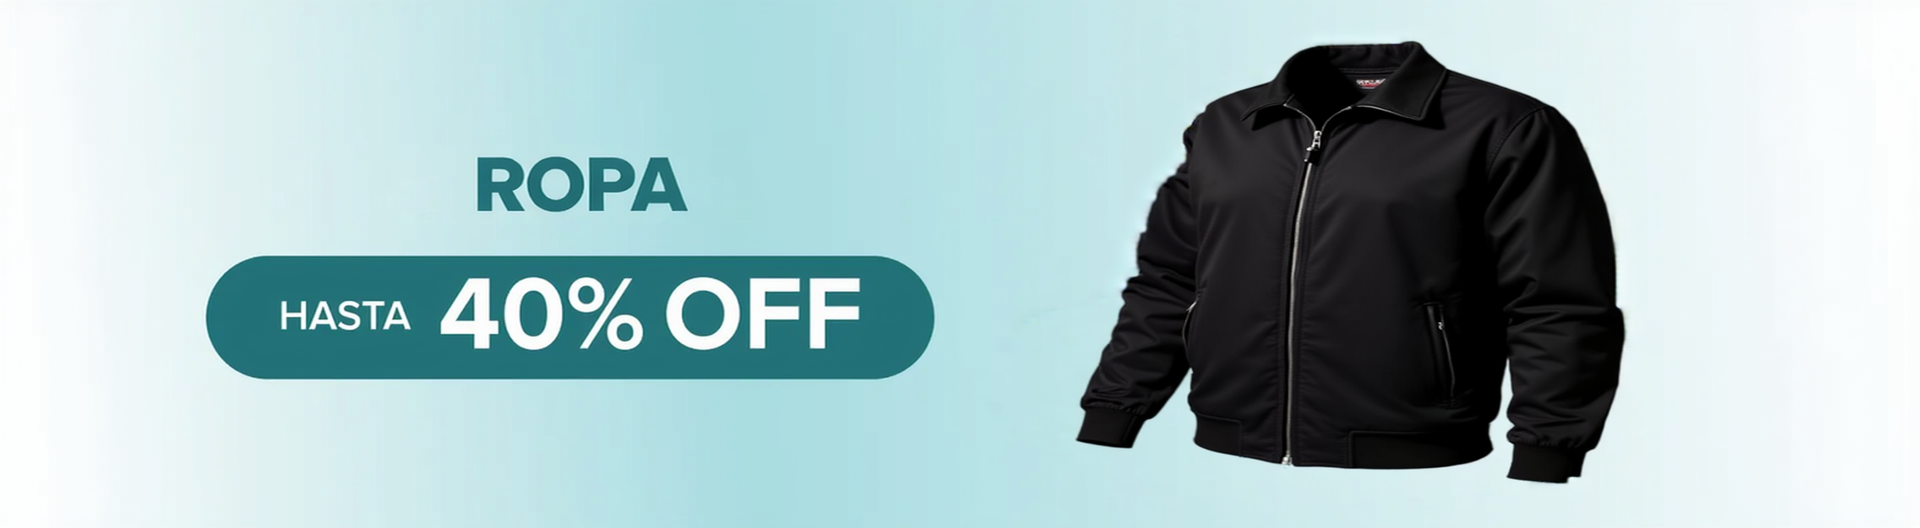

In [10]:
from PIL import Image  

# Resize the result back to the original input image size
result_resized_2 = result.resize(image.size, Image.LANCZOS)

# Optional: Show or save
print(f"Final result size: {result_resized_2.size}")
result_resized_2.save("input_data/4_output_resized_2.png")
result_resized_2


(1920, 528)


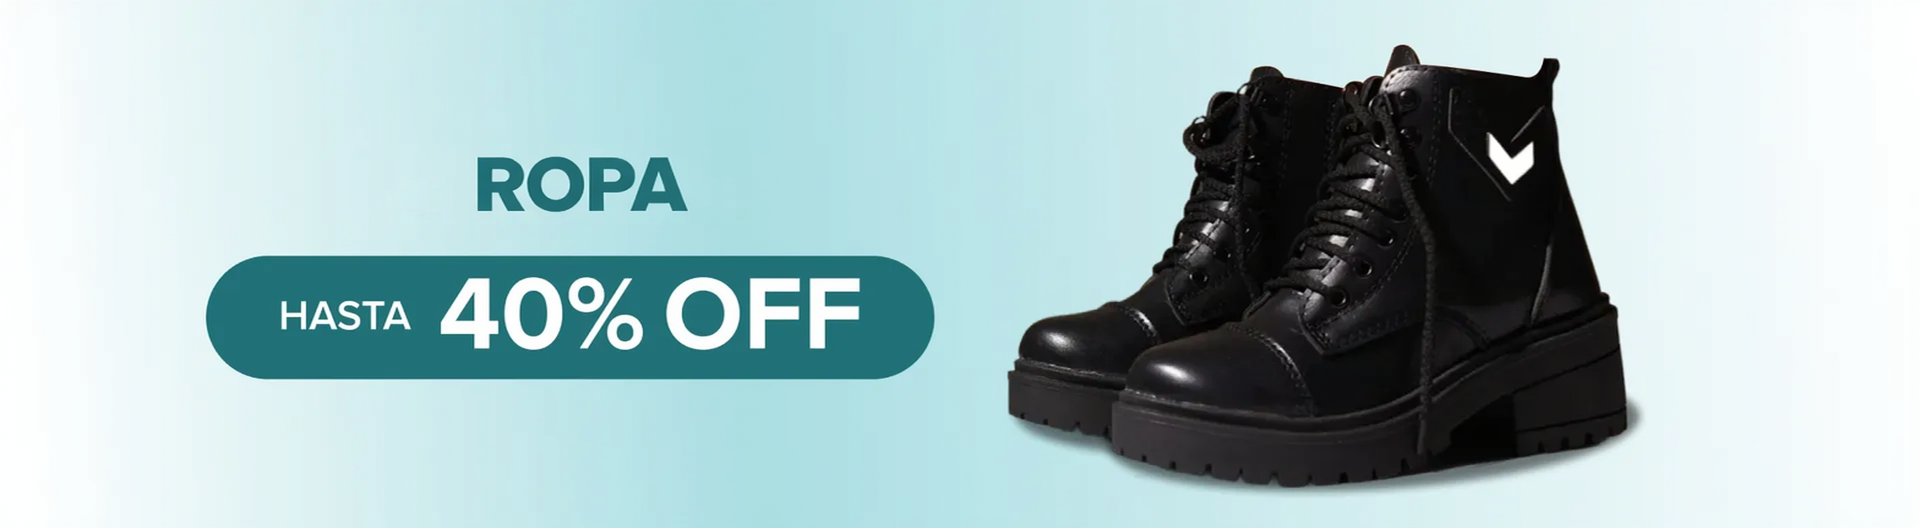

In [11]:
print(image.size)
image

(1920, 528)


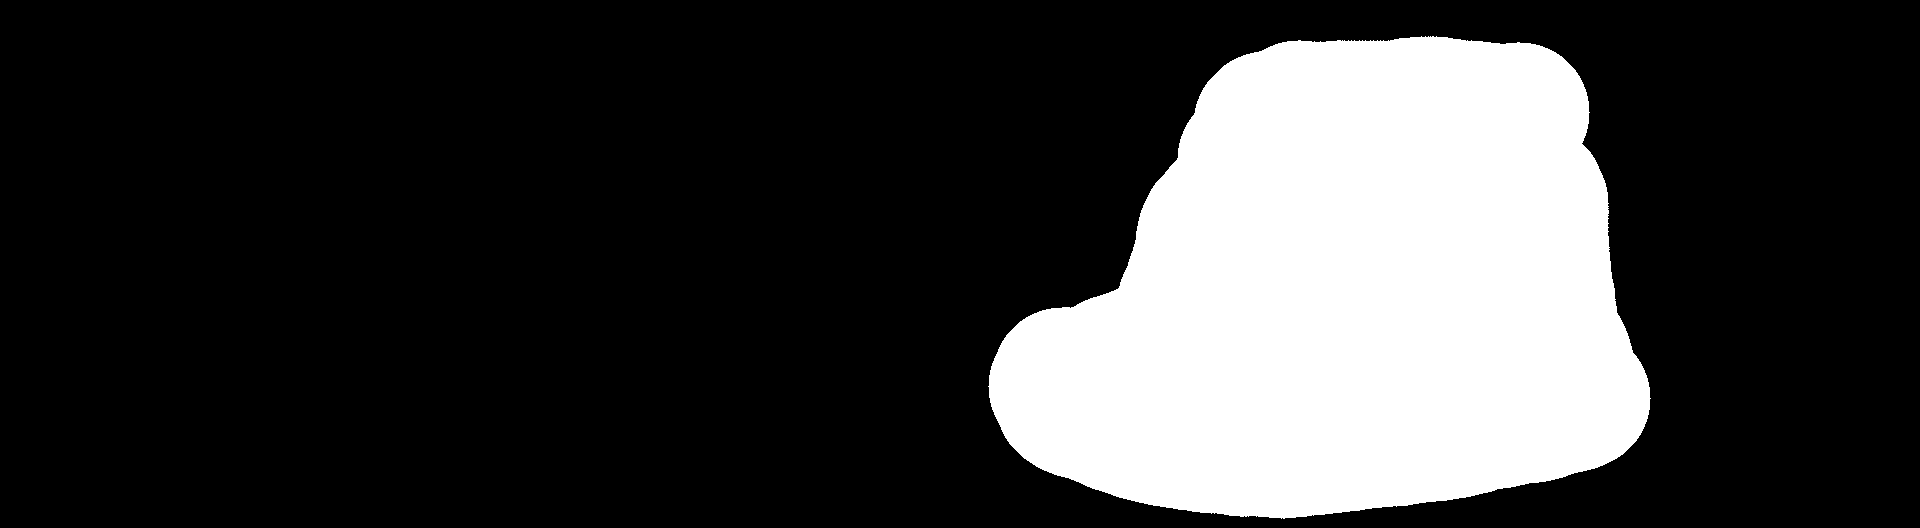

In [12]:
print(mask.size)
mask

## Resultado Final

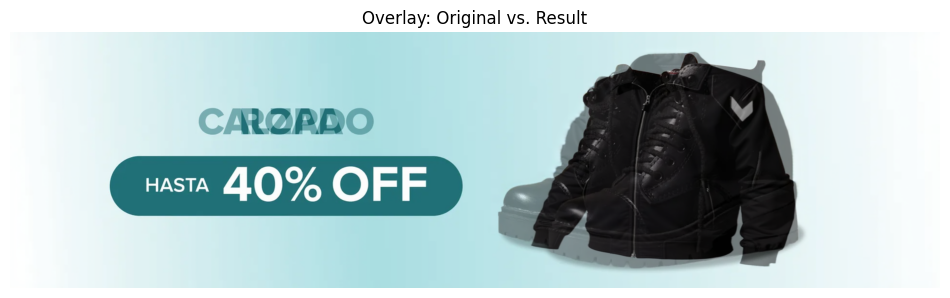

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

# === Load the images ===
img_original = Image.open("input_data/4.png").convert("RGBA")
img_result = Image.open("input_data/4_output_resized_2.png").convert("RGBA")

# === Blend the images (50% transparency) ===
blended = Image.blend(img_original, img_result, alpha=0.5)

# === Show in notebook ===
plt.figure(figsize=(12, 6))
plt.imshow(blended)
plt.axis("off")
plt.title("Overlay: Original vs. Result")
plt.show()


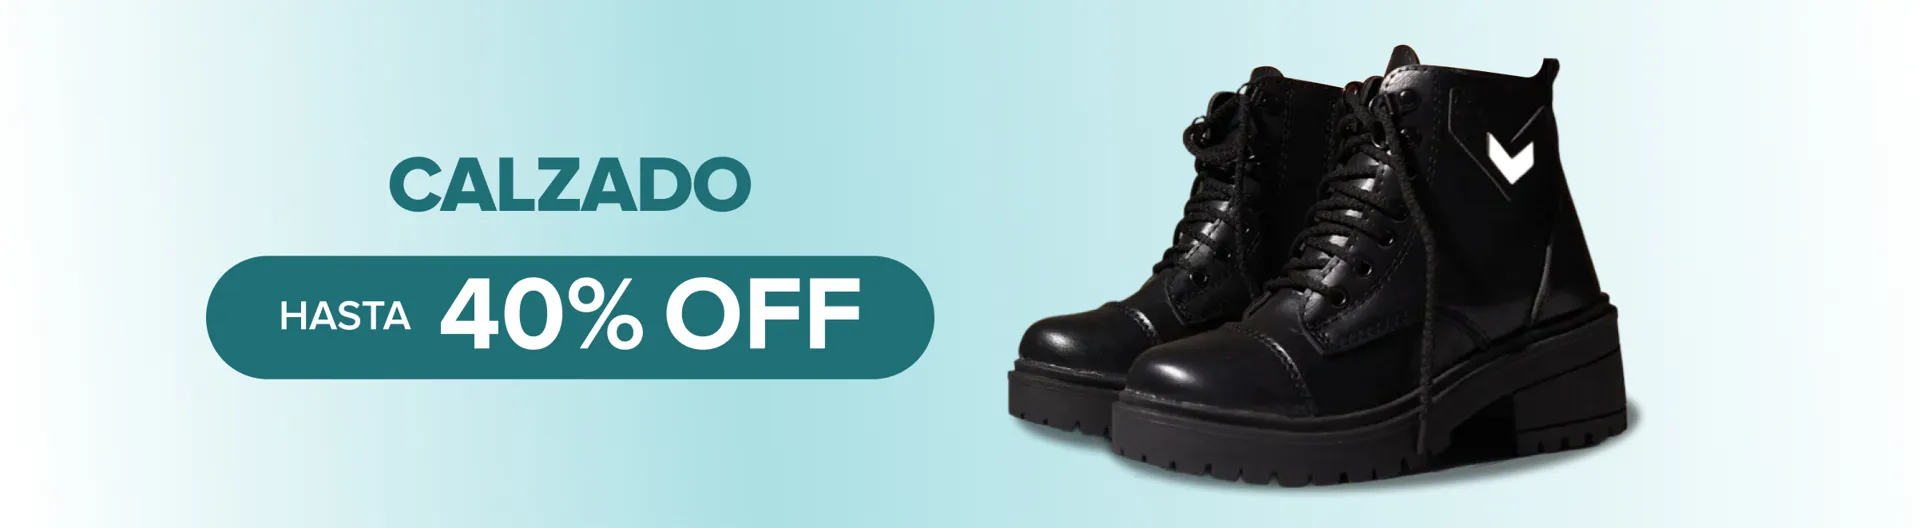

In [14]:
img_original

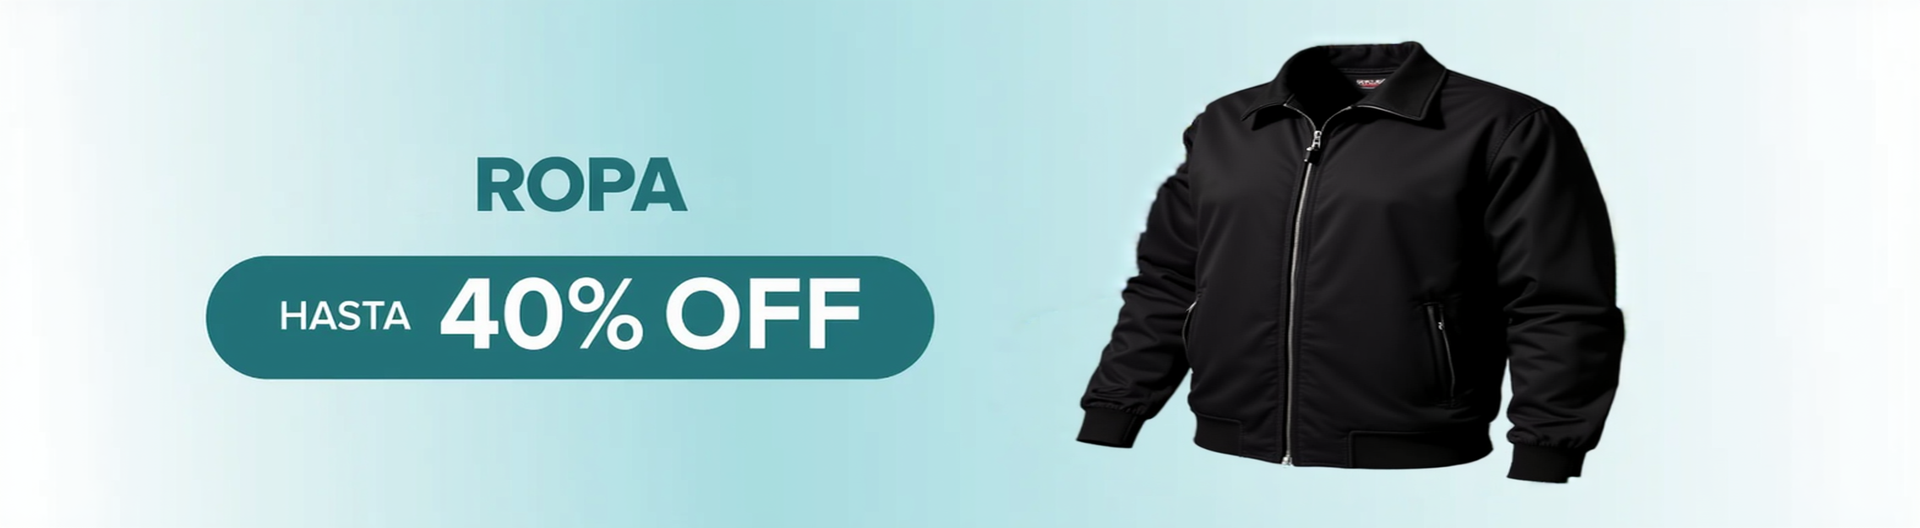

In [15]:
img_result